In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# Load dataset
data = pd.read_csv('Womens-Clothing-E-Commerce-Reviews.csv')

In [ ]:
print(data.info())

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

print(data)

In [9]:
print(data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [11]:
# Configurer pandas pour afficher plus de lignes et colonnes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Afficher le dataset complet (ou jusqu'aux limites configurées)
print(data)

       Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of c

In [12]:
# Drop unnecessary columns and display first few rows
data_df = data.drop(['Age', 'Unnamed: 0', 'Clothing ID', 'Rating', 'Positive Feedback Count', 'Title', 'Unnamed: 0'], axis=1)
data_df.head()

,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,1,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,1,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",1,General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,1,General,Tops,Blouses


In [13]:
# Summarize missing data
print("Sum of Missing Data\n")
print(data_df.isna().sum())
print("-------------------------------------------------\n")
# Drop rows with missing values in 'Class Name' and display missing data sum
data_df = data_df.dropna(subset=['Class Name', 'Review Text'])
print(data_df.isna().sum())

Sum of Missing Data

Review Text        845
Recommended IND      0
Division Name       14
Department Name     14
Class Name          14
dtype: int64
-------------------------------------------------

Review Text        0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64


In [14]:
data_df['Recommended IND'] = data_df['Recommended IND'].replace({0: 'Negative', 1: 'Positive'})
data_df.head()

,Review Text,Recommended IND,Division Name,Department Name,Class Name
0,Absolutely wonderful - silky and sexy and comf...,Positive,Initmates,Intimate,Intimates
1,Love this dress! it's sooo pretty. i happene...,Positive,General,Dresses,Dresses
2,I had such high hopes for this dress and reall...,Negative,General,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,General Petite,Bottoms,Pants
4,This shirt is very flattering to all due to th...,Positive,General,Tops,Blouses


In [15]:
# Add new column for review length and display random samples
data_df['Review_length'] = data_df['Review Text'].apply(len)
data_df.sample(10)

#Exploring the Length of each Review
a = data_df['Review_length'].describe()
print ('Description\n',a)
print("-------------------------------------------------\n")
# Display longest and shortest reviews
print('Longest Review =', data_df[data_df['Review_length'] == data_df['Review_length'].max()]['Review Text'].iloc[0])
print('Shortest Review =', data_df[data_df['Review_length'] == data_df['Review_length'].min()]['Review Text'].iloc[0])

Description
 count    22628.000000
mean       308.761534
std        143.934126
min          9.000000
25%        186.000000
50%        302.000000
75%        459.000000
max        508.000000
Name: Review_length, dtype: float64
-------------------------------------------------

Longest Review = I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl
Shortest Review = Great fit


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meriem\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


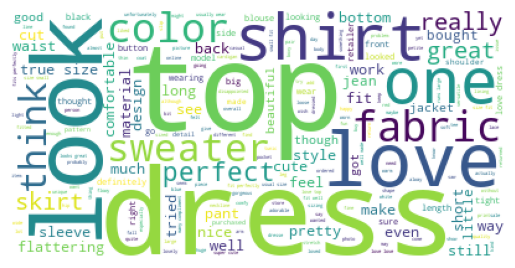

In [18]:
#Text Preprocessing for Reviews
import nltk
import re
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to preprocess text data
def text_processing(text):
    # Remove non-alphabetic characters and stopwords
    text = re.sub('[^A-Za-z]+', ' ', str(text)).lower()
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply text processing and generate word cloud
data_df['Processed_Text'] = data_df['Review Text'].apply(text_processing)
text_for_wordcloud = ' '.join(review for review in data_df['Processed_Text'])
wordcloud = WordCloud(background_color ='white').generate(text_for_wordcloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:

import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Define a mapping from string values to integers
mapping = {'Positive': 1, 'Negative': 0}

# Apply the mapping to the target variable
Y = data_df['Recommended IND'].apply(lambda x: mapping[x])

# Tokenize the text data without limiting the number of words
tokenizer = Tokenizer(split=' ')
tokenizer.fit_on_texts(data_df['Processed_Text'].values)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(data_df['Processed_Text'].values)

# Calculate the length of each review
review_lengths = [len(x) for x in sequences]

# Calculate the 5th and 95th percentiles
fifth_percentile = np.percentile(review_lengths, 5)
ninety_fifth_percentile = np.percentile(review_lengths, 95)

# Filter out reviews outside the 5th to 95th percentile range
filtered_sequences = [seq for seq in sequences if len(seq) >= fifth_percentile and len(seq) <= ninety_fifth_percentile]
# Apply the mapping to convert string labels to integers during filtering
filtered_labels = [mapping[data_df['Recommended IND'].iloc[i]] for i, seq in enumerate(sequences) if len(seq) >= fifth_percentile and len(seq) <= ninety_fifth_percentile]
# Pad sequences
max_seq_length = 400
X = pad_sequences(filtered_sequences, maxlen=max_seq_length)

# Convert labels to numpy array
Y = np.array(filtered_labels)

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the embedding input dimension as the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import time
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

# Define the neural network architecture with the correct embedding input dimension
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, 256, input_length=max_seq_length))  # Adjust the embedding layer
model_lstm.add(LSTM(256, dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))
# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set up callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# Model training
start_time = time.time()
model_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64, callbacks=[early_stop, checkpoint])

# Load the best model
model_lstm.load_weights('best_model.h5')

# Test the model
Y_pred = model_lstm.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)

end_time = time.time()
execution_time = end_time - start_time  # Execution time in seconds

# Print the performance metrics
print('Accuracy:', accuracy)
print("Execution time: %.2f seconds" % execution_time)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Définir les modèles de régression logistique et de forêt aléatoire
models = [("Logistic Regression", LogisticRegression(max_iter=100000)), 
          ("Random Forest", RandomForestClassifier())]

# Chargement du dataset (assurez-vous que data_df est défini correctement)
# data_df = pd.read_csv('Womens-Clothing-E-Commerce-Reviews.csv')
# Ici, on suppose que data_df contient les colonnes 'Processed_Text' et 'Recommended IND'
X = data_df['Processed_Text']
y = data_df['Recommended IND']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectoriser les données textuelles
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entraîner les modèles et mesurer le temps d'exécution
for name, model in models:
    start_time = time.time()
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    execution_time = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    
    # Afficher les métriques d'évaluation
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Execution time: %.2f seconds" % execution_time)
    print(f"-------------------------------------------------\n")


Model: Logistic Regression
Accuracy: 0.8800265134776845
Execution time: 0.34 seconds
-------------------------------------------------

Model: Random Forest
Accuracy: 0.8548387096774194
Execution time: 26.18 seconds
-------------------------------------------------



In [25]:
# Testing new text data with Logistic Regression and Random Forest models
unseen_text = ["How can the color differ so much. Sad and disappointed", "Top is lovely", "Not recommending this shirt"]
unseen_text_vec = vectorizer.transform(unseen_text)

for name, model_tts in models:
    unseen_text_pred = model_tts.predict(unseen_text_vec)
    for i, text in enumerate(unseen_text):
        print(f"Prediction: {unseen_text_pred[i]}")
    print("-------------------------------------------------\n")

Prediction: Negative
Prediction: Positive
Prediction: Positive
-------------------------------------------------

Prediction: Negative
Prediction: Positive
Prediction: Positive
-------------------------------------------------



C:\Users\Meriem\AppData\Local\Temp\ipykernel_15036\1471906961.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended IND', data=data_df, palette='viridis')


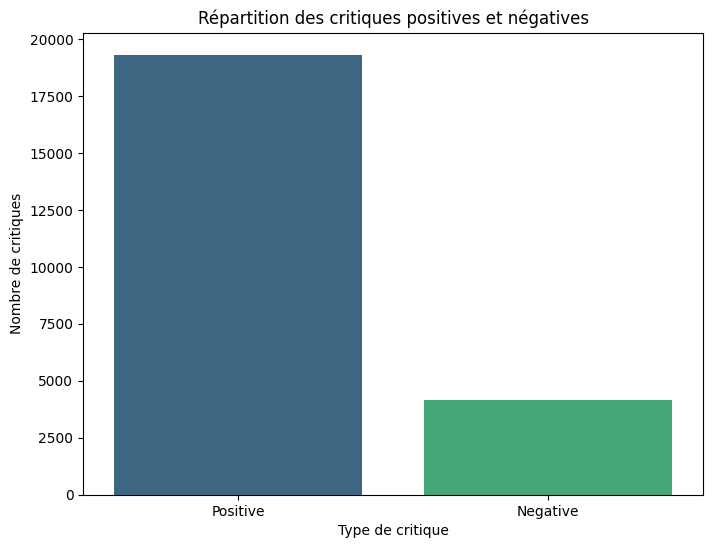

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
data_df = pd.read_csv('Womens-Clothing-E-Commerce-Reviews.csv')

# Convertir 'Recommended IND' en catégories lisibles
data_df['Recommended IND'] = data_df['Recommended IND'].map({1: 'Positive', 0: 'Negative'})

# Histogramme de la répartition des critiques positives et négatives
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommended IND', data=data_df, palette='viridis')
plt.title('Répartition des critiques positives et négatives')
plt.xlabel('Type de critique')
plt.ylabel('Nombre de critiques')
plt.show()


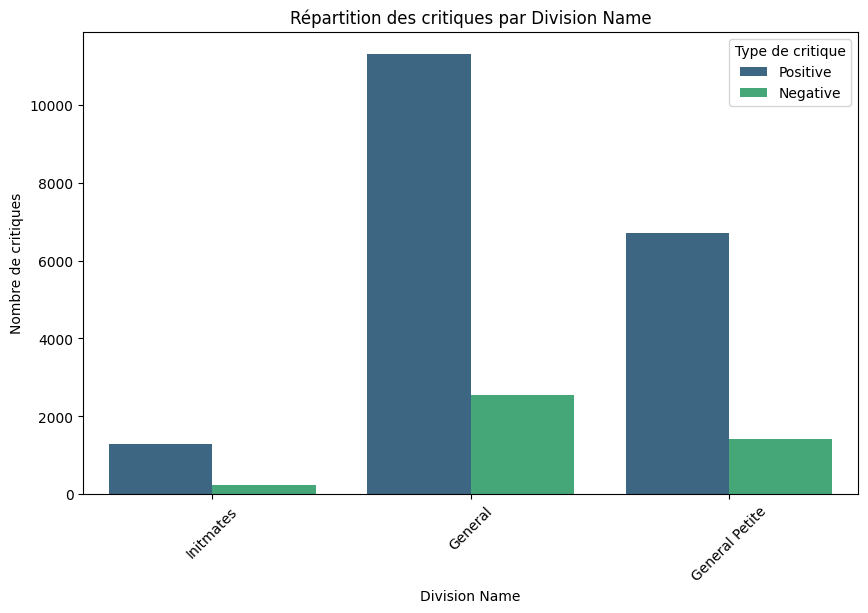

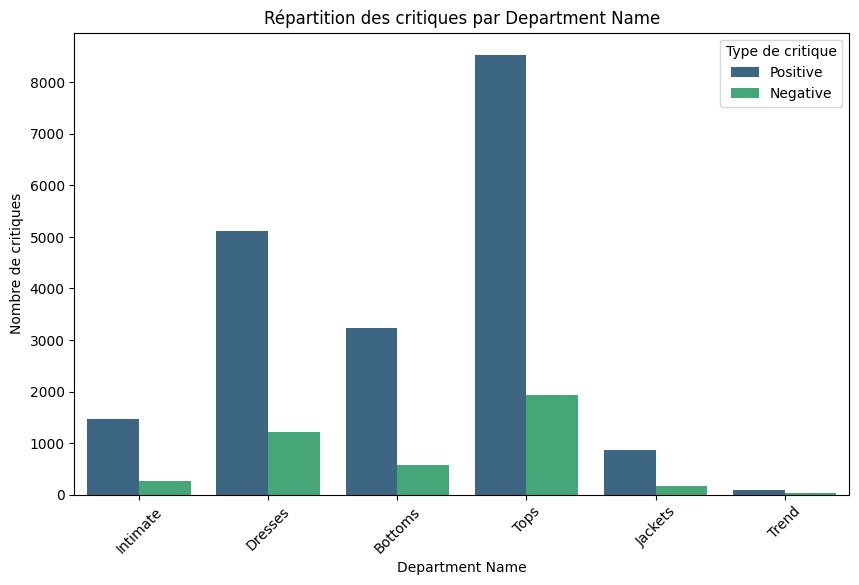

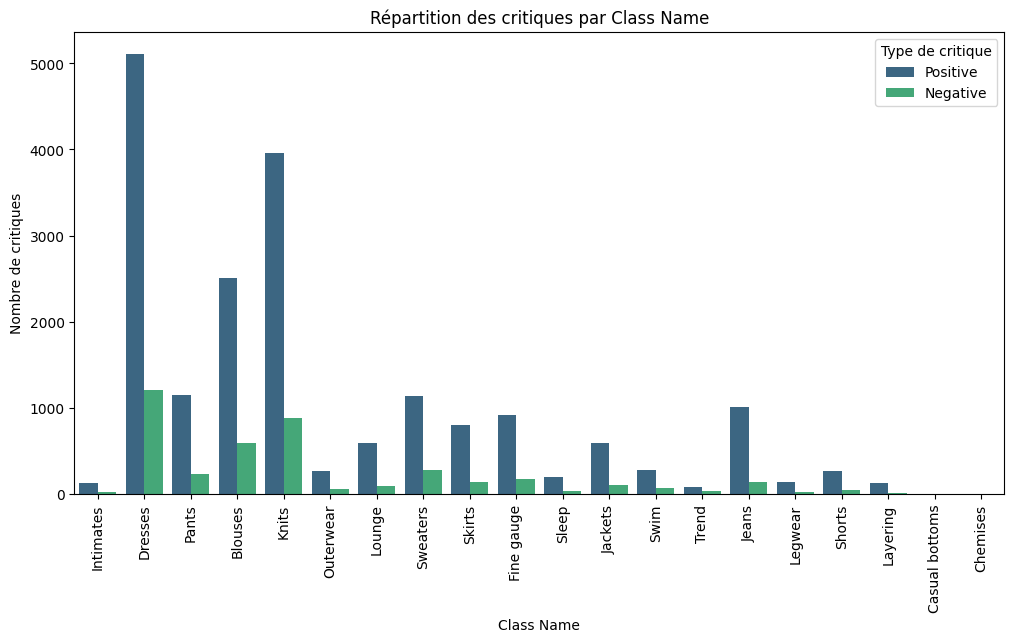

In [23]:
# Diagramme à barres par 'Division Name'
plt.figure(figsize=(10, 6))
sns.countplot(x='Division Name', hue='Recommended IND', data=data_df, palette='viridis')
plt.title('Répartition des critiques par Division Name')
plt.xlabel('Division Name')
plt.ylabel('Nombre de critiques')
plt.legend(title='Type de critique')
plt.xticks(rotation=45)
plt.show()

# Diagramme à barres par 'Department Name'
plt.figure(figsize=(10, 6))
sns.countplot(x='Department Name', hue='Recommended IND', data=data_df, palette='viridis')
plt.title('Répartition des critiques par Department Name')
plt.xlabel('Department Name')
plt.ylabel('Nombre de critiques')
plt.legend(title='Type de critique')
plt.xticks(rotation=45)
plt.show()

# Diagramme à barres par 'Class Name'
plt.figure(figsize=(12, 6))
sns.countplot(x='Class Name', hue='Recommended IND', data=data_df, palette='viridis')
plt.title('Répartition des critiques par Class Name')
plt.xlabel('Class Name')
plt.ylabel('Nombre de critiques')
plt.legend(title='Type de critique')
plt.xticks(rotation=90)
plt.show()


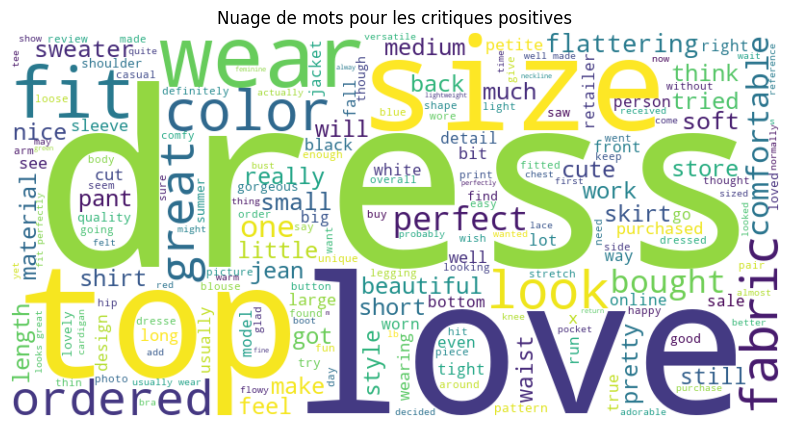

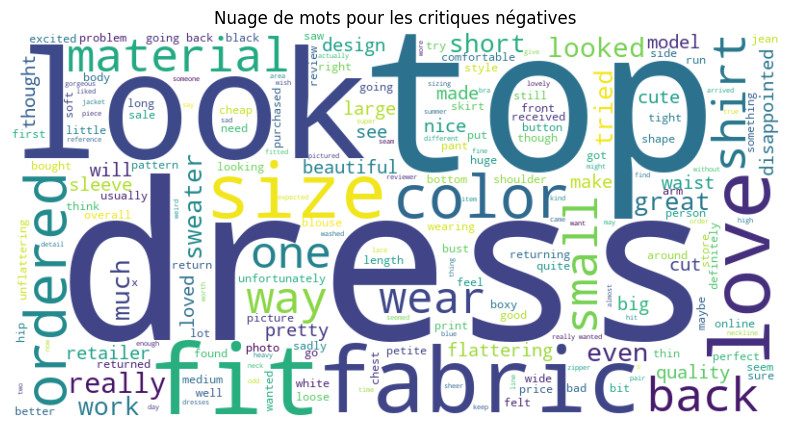

In [24]:
from wordcloud import WordCloud

# Filtrer les critiques positives et négatives
positive_reviews = data_df[data_df['Recommended IND'] == 'Positive']['Review Text'].str.cat(sep=' ')
negative_reviews = data_df[data_df['Recommended IND'] == 'Negative']['Review Text'].str.cat(sep=' ')

# Générer le nuage de mots pour les critiques positives
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Afficher le nuage de mots pour les critiques positives
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nuage de mots pour les critiques positives')
plt.axis('off')
plt.show()

# Générer le nuage de mots pour les critiques négatives
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Afficher le nuage de mots pour les critiques négatives
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nuage de mots pour les critiques négatives')
plt.axis('off')
plt.show()
